<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/EBTIC_Advanced_AI_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [5]:
# Load in the data 
df = pd.read_csv('/content/exfil_monogram.csv')

In [6]:
df

,epoll_pwait,futex,getuid,ioctl,read,mprotect,write,clock_gettime,madvise,writev,...,personality,set_tls,capget,fstatfs64,getegid32,getgid32,getgroups32,ptrace,setsid,Label
0,248,102,295,187,36,29,115,12,104,37,...,0,0,0,0,0,0,0,0,0,0
1,423,217,393,253,104,31,317,13,17,38,...,0,0,0,0,0,0,0,0,0,0
2,31,18,58,83,4,1,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,31,20,60,85,4,2,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,31,19,64,96,4,2,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,61,103,0,35,48,12,70,1019,1,5,...,0,0,0,0,0,0,0,0,0,1
6137,2,33,1,1,3,15,2,0,2,0,...,0,0,0,0,0,0,0,0,0,1
6138,158,80,0,199,71,21,85,1146,4,10,...,0,0,0,0,0,0,0,0,0,1
6139,52,12,0,26,13,5,38,291,1,5,...,0,0,0,0,0,0,0,0,0,1


In [7]:
Input = tf.keras.Input((120, 1))
conv = tf.keras.layers.Conv1D(1, 70, 5)(Input)
conv = tf.keras.layers.Flatten(name="regions")(conv)
clf = tf.keras.layers.Dense(2, activation="sigmoid")(conv)
model = tf.keras.Model(inputs=Input, outputs=clf)

In [8]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy())

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 11, 1)             71        
                                                                 
 regions (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 2)                 24        
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


In [11]:
from sklearn.preprocessing import OneHotEncoder
y_train = OneHotEncoder().fit_transform(df["Label"].values.reshape(-1, 1)).toarray()
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [13]:
hist = model.fit(
    x=df.values[:, :-1],
    y=y_train,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
154/154 [==============================] - 1s 4ms/step - loss: 163.1583 - val_loss: 16.1913
Epoch 2/20
154/154 [==============================] - 0s 3ms/step - loss: 4.8291 - val_loss: 2.3396
Epoch 3/20
154/154 [==============================] - 0s 3ms/step - loss: 1.4965 - val_loss: 1.3120
Epoch 4/20
154/154 [==============================] - 0s 2ms/step - loss: 1.0429 - val_loss: 0.6764
Epoch 5/20
154/154 [==============================] - 0s 2ms/step - loss: 0.8165 - val_loss: 0.8258
Epoch 6/20
154/154 [==============================] - 0s 2ms/step - loss: 0.7162 - val_loss: 0.7920
Epoch 7/20
154/154 [==============================] - 0s 2ms/step - loss: 0.6126 - val_loss: 0.6695
Epoch 8/20
154/154 [==============================] - 0s 2ms/step - loss: 0.5585 - val_loss: 0.5758
Epoch 9/20
154/154 [==============================] - 0s 3ms/step - loss: 0.4749 - val_loss: 0.6017
Epoch 10/20
154/154 [==============================] - 0s 3ms/step - loss: 0.4340 - val_loss: 1.0

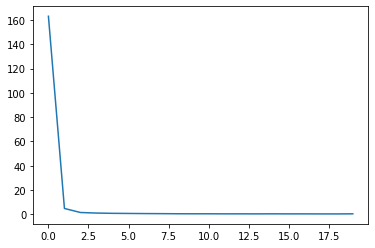

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"]);